In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.autonotebook import tqdm 

from traffic.core import Traffic

In [4]:
t1 = Traffic.from_file("../deep_traffic_generation/data/training_datasets/landings_south_LFPO_25.pkl")
t1_gen = Traffic.from_file("../deep_traffic_generation/data/generated_datasets/gen_ldng_LFPO_25_1.pkl")

t2 = Traffic.from_file("../deep_traffic_generation/data/training_datasets/takeoffs_south_LFPO_24.pkl")
t2_gen = Traffic.from_file("../deep_traffic_generation/data/generated_datasets/gen_to_LFPO_24_1.pkl")

In [29]:
t2[:1000].map_leaflet()

Map(center=[48.3953264874153, 2.2930871053072575], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [30]:
t2_gen[:1000].map_leaflet()

Map(center=[48.4107844085895, 2.313075061195395], controls=(ZoomControl(options=['position', 'zoom_in_text', '…

In [ ]:
t1[:1000].map_leaflet()

In [ ]:
t1_gen[:1000].map_leaflet()

# Altitude profile comparison

In [5]:
t1 = t1.iterate_lazy().cumulative_distance(reverse = True).eval(desc = "", max_workers = 50)
t1_gen_short = t1_gen[:1000].iterate_lazy().cumulative_distance(reverse = True).eval(desc = "", max_workers = 50)

Output()

/cluster/home/kruu/miniconda3/envs/tcas/lib/python3.9/site-packages/traffic/core/lazy.py:231: TqdmExperimentalWarning: rich is experimental/alpha
  tasks_completed = tqdm(


Output()

/cluster/home/kruu/miniconda3/envs/tcas/lib/python3.9/site-packages/traffic/core/lazy.py:231: TqdmExperimentalWarning: rich is experimental/alpha
  tasks_completed = tqdm(


In [6]:
t2 = t2.iterate_lazy().cumulative_distance().eval(desc = "", max_workers = 50)
t2_gen_short = t2_gen[:1000].iterate_lazy().cumulative_distance().eval(desc = "", max_workers = 50)

Output()

/cluster/home/kruu/miniconda3/envs/tcas/lib/python3.9/site-packages/traffic/core/lazy.py:231: TqdmExperimentalWarning: rich is experimental/alpha
  tasks_completed = tqdm(


Output()

/cluster/home/kruu/miniconda3/envs/tcas/lib/python3.9/site-packages/traffic/core/lazy.py:231: TqdmExperimentalWarning: rich is experimental/alpha
  tasks_completed = tqdm(


In [5]:
import altair as alt

chart1 = alt.layer(
    *(
        flight.chart().encode(
            x=alt.X(
                "cumdist",
                scale=alt.Scale(reverse=True),
                title="Distance from start (in Nm)",
            ),
            y=alt.Y("altitude", title=None),
            opacity=alt.value(0.2),
            color=alt.value("#9ecae9"),
        )
        for flight in t1[:500]
    )
).properties(
    width=800,
    height=300
)

chart2 = alt.layer(
    *(
        flight.chart().encode(
            x=alt.X(
                "cumdist",
                scale=alt.Scale(reverse=True),
                title="Distance from start (in Nm)",
            ),
            y=alt.Y("altitude", title=None),
            opacity=alt.value(0.2),
            color=alt.value("#ffbf79"),
        )
        for flight in t1_gen_short[:500]
    )
).properties(
    width=800,
    height=300,
)

chart2 + chart1


In [ ]:
chart3 = alt.layer(
    *(
        flight.chart().encode(
            x=alt.X(
                "cumdist",
                title="Distance from start (in Nm)",
            ),
            y=alt.Y("altitude", title=None),
            opacity=alt.value(0.2),
            color=alt.value("#9ecae9"),
        )
        for flight in t2[:500]
    )
).properties(
    width=800,
    height=300
)

chart4 = alt.layer(
    *(
        flight.chart().encode(
            x=alt.X(
                "cumdist",
                title="Distance from start (in Nm)",
            ),
            y=alt.Y("altitude", title=None),
            opacity=alt.value(0.2),
            color=alt.value("#ffbf79"),
        )
        for flight in t2_gen_short[:500]
    )
).properties(
    width=800,
    height=300,
)

chart4+chart3

In [17]:
from ipyleaflet import Map, basemaps, Marker, MarkerCluster, Polygon, AwesomeIcon
from ipywidgets import Layout
from traffic.data import airports

map_ = Map(
    center=airports["LFPO"].latlon,
    zoom=10,
    basemap=basemaps.Stamen.Terrain,
    layout=Layout(width="100%", height="1000px"),
)

polygon1 = Polygon(
    locations=[(48.60, 2.20), (48.50, 2.20), (48.50, 2.30), (48.60,2.30)],
    color="#4c78a8",
    fill_color="#4c78a8"
)
map_.add_layer(polygon1)

map_

Map(center=[48.7233333, 2.3794444], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

For takeoffs: 

- PO301: MAX FL100 : 48°28'43.2"N  002°18'57.6"E
- PO300: MAX FL100 : 48°29'37.9"N  002°22'3.1"E

Donc dans la bbox du dessus, on est avant les navpoints, et donc on doit être bien en dessous du FL100. Donc on doit enlever tous les takeoffs qui sont au dessus du FL100 au niveau des PO300 / PO301

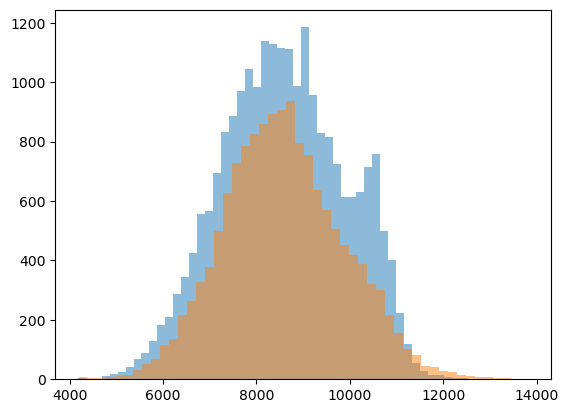

In [26]:
#Comparison of true altitdue and generated altitude around arpajon of takeoffs
plt.hist(t2[:1500].inside_bbox((2.20, 48.50, 2.30, 48.6)).data.altitude, bins = 50, alpha = 0.5)
plt.hist(t2_gen[:1500].inside_bbox((2.20, 48.50, 2.30, 48.6)).data.altitude, bins = 50, alpha = 0.5)
plt.show()

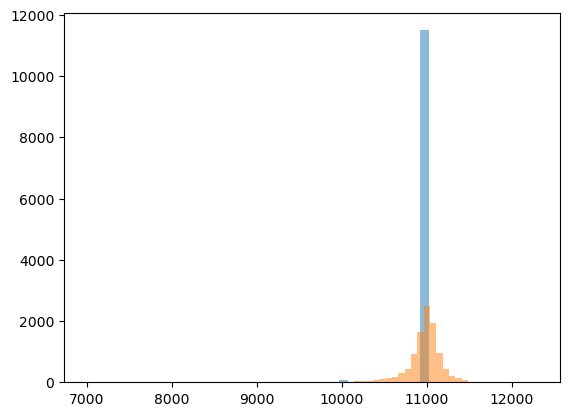

In [25]:
#Comparison of true altitdue and generated altitude around arpajon of takeoffs
plt.hist(t1[:1500].inside_bbox((2.20, 48.50, 2.30, 48.6)).data.altitude, bins = 50, alpha = 0.5)
plt.hist(t1_gen[:1500].inside_bbox((2.20, 48.50, 2.30, 48.6)).data.altitude, bins = 50, alpha = 0.5)
plt.show()